In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import theano.tensor as T
import theano

In [2]:
df = pd.read_csv('./fer2013/fer2013.csv')
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [3]:
df['Usage'].value_counts()

Training       28709
PrivateTest     3589
PublicTest      3589
Name: Usage, dtype: int64

In [4]:
len(df['pixels'][0].split())

2304

In [5]:
df.shape

(35887, 3)

In [6]:
Y_all = df['emotion'].astype(int)
X_all = []
for i in df['pixels']:
    X_all.append([int(p) for p in i.split()])
X_all, Y_all = np.array(X_all), np.array(Y_all)

In [7]:
print(X_all.shape)
print(Y_all.shape)

(35887, 2304)
(35887,)


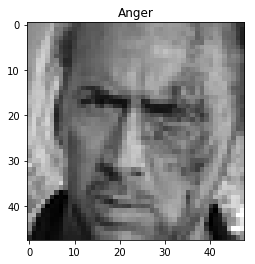

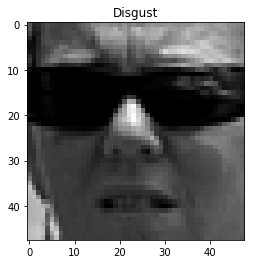

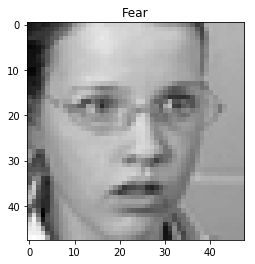

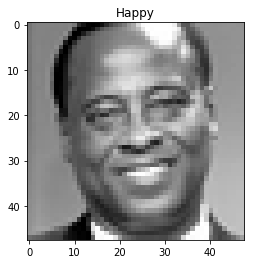

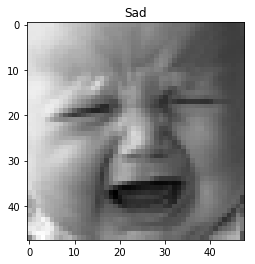

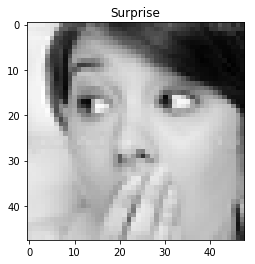

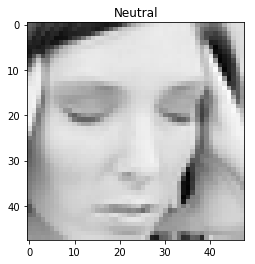

In [8]:
# show one of each emtion randomly
label_map = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

for i in range(7):
    x, y = X_all[Y_all==i], Y_all[Y_all==i]
    N = len(y)
    j = np.random.choice(N)
    plt.imshow(x[j].reshape(48,48), cmap='gray')
    plt.title(label_map[y[j]])
    plt.show()

In [9]:
def classification_rate(Y,P):
    return np.mean(Y == P)

In [10]:
def ohe(Y):
    ohe_Y = np.zeros((N,K))
    for i in range(N):
        ohe_Y[i, Y[i]] = 1
    return ohe_Y

In [12]:
# set the dimensions:
N, D = X_all.shape
M1 = 2000
M2 = 1000
K = len(set(Y_all))

In [13]:
X = X_all / 255
Y = ohe(Y_all)

In [14]:
print(X.shape)
print(type(X))
print(Y.shape)
print(type(Y))

(35887, 2304)
(35887, 7)


In [17]:
W1_init = np.random.randn(D,M1) / np.sqrt(D+M1)
b1_init = np.zeros(M1)
W2_init = np.random.randn(M1,M2) / np.sqrt(M1+M2)
b2_init = np.zeros(M2)
W3_init = np.random.randn(M2,K) / np.sqrt(M2+K)
b3_init = np.zeros(K)

In [18]:
W1 = theano.shared(W1_init, 'W1')
b1 = theano.shared(b1_init, 'b1')
W2 = theano.shared(W2_init, 'W2')
b2 = theano.shared(b2_init, 'b2')
W3 = theano.shared(W3_init, 'W3')
b3 = theano.shared(b3_init, 'b3')

In [20]:
thX = T.matrix('X')
thT = T.matrix('T')

In [21]:
# we can use the built-in theano functions to do relu and softmax
thZ1 = T.nnet.relu( thX.dot(W1) + b1 )
thZ2 = T.nnet.relu( thZ1.dot(W2) + b2 )
thY = T.nnet.softmax( thZ2.dot(W3) + b3 )

In [22]:
lr = 10e-7
mu = 0.99
decay = 0.999
epochs = 400

In [ ]:
# define the cost function and prediction
cost = -(thT * T.log(thY)).sum() + reg*((W1*W1).sum() + (b1*b1).sum() + (W2*W2).sum() + (b2*b2).sum())
prediction = T.argmax(thY, axis=1)

In [55]:
batch_size = 1000
n_batches = N//batch_size
# for i in range(120000): # from course
for i in range(1500):
    temp_X, temp_Y = shuffle(X, Y)
    for j in range(n_batches):
    
        X_batch = temp_X[j*batch_size:(j*batch_size+batch_size),:]
        Y_batch = temp_Y[j*batch_size:(j*batch_size+batch_size),:]

        hidden = sigmoid(Z(X_batch, W0, b0))
        pred   = softmax(Z(hidden, W1, b1))

        cost1 = cost(Y_batch, pred)
        error1 = error(cost1)

        dZ1 = Y_batch-pred
        dW1 = np.dot(hidden.T, dZ1)
        db1 = (dZ1.sum(axis=0))

        dZ0 = np.dot(dZ1, W1.T)*(hidden*(1-hidden))
        dW0 = np.dot(X_batch.T, dZ0)
        db0 = (dZ0.sum(axis=0))

        W1 += lr*dW1
        b1 += lr*db1
        W0 += lr*dW0
        b0 += lr*db0
                     
        if j % n_batches/2 == 0:
            print('error: {}'.format(error1))
            err.append(error1)
            acc.append(classification_rate(Y_batch, np.round(pred)))

error: 0.18279507833280467
error: 0.17313378982872524
error: 0.1724229889447982
error: 0.16199638999506416
error: 0.1548494517431262
error: 0.1425274704277668
error: 0.1466526268405964
error: 0.13727866576126319
error: 0.13344187542635835
error: 0.13078434638862488
error: 0.13089087917188874
error: 0.12589580239561404
error: 0.12191432027618491
error: 0.1220108629691213
error: 0.1153546050659987
error: 0.11804660843687671
error: 0.11192353371821133
error: 0.10779377383250859
error: 0.10609888035852
error: 0.104908195933272
error: 0.10627974100756539
error: 0.10026236852945952
error: 0.10128177981376577
error: 0.09693200503193805
error: 0.09712049398283178
error: 0.09825739793575575
error: 0.09269938768830728
error: 0.09239454500804824
error: 0.09435207222907618
error: 0.08853788802252052
error: 0.08817825646579519
error: 0.09006484289201487
error: 0.087041089886033
error: 0.08743166057439973
error: 0.08118351939242499
error: 0.08327534017957833
error: 0.0851336765930526
error: 0.083520

error: 0.05099679837963955
error: 0.05127960345909206
error: 0.05110573478791697
error: 0.05106939693586883
error: 0.05029096328576507
error: 0.0514193004544156
error: 0.05116125822334165
error: 0.051498276656794136
error: 0.05145418633798636
error: 0.051105900678417825
error: 0.05100106980396233
error: 0.05074878053410205
error: 0.05163482965261915
error: 0.05091524683493858
error: 0.05117660560109865
error: 0.051093877826107824
error: 0.05137541968166431
error: 0.05135906223969275
error: 0.05103792776058964
error: 0.0509159031253076
error: 0.05079644369603719
error: 0.05088635733092234
error: 0.051528536330986585
error: 0.05086134781327293
error: 0.051600694284864
error: 0.051376621982751704
error: 0.05108431308356779
error: 0.051406737114269616
error: 0.05060197215056624
error: 0.05105260597344067
error: 0.05158615121395463
error: 0.05100831021061562
error: 0.05094162277081957
error: 0.0517135973888369
error: 0.05152655757169226
error: 0.051127962572752886
error: 0.05094341444583532

error: 0.050387217046313104
error: 0.050780246370840186
error: 0.050960584318730455
error: 0.050686041292924124
error: 0.05112176784067505
error: 0.05088611848575222
error: 0.05085029303638726
error: 0.051063512041606876
error: 0.05099949731832713
error: 0.05102223051478384
error: 0.05096875885323414
error: 0.05053510873235582
error: 0.050371768634138496
error: 0.05034729598504036
error: 0.05090454794174902
error: 0.05067077435873794
error: 0.05065029628201639
error: 0.0502241631938095
error: 0.050355516145304084
error: 0.050890201537272105
error: 0.0508750095455979
error: 0.050778044817262634
error: 0.051260095720974536
error: 0.05096711210362176
error: 0.05052183980065941
error: 0.051065499549626595
error: 0.05054355907293634
error: 0.0508618244763689
error: 0.051164649026618
error: 0.05083879471875396
error: 0.05060251192594649
error: 0.05094728987328687
error: 0.05092692545104848
error: 0.051489738007653774
error: 0.050542646891984296
error: 0.050633906555426655
error: 0.0503365818

KeyboardInterrupt: 

In [56]:
classification_rate(Y_batch, np.round(pred))

0.8565714285714285

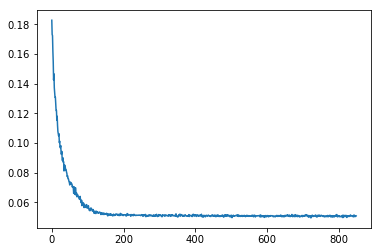

In [57]:
#plt.axes(xlim=(0,15), ylim=(1.75,1.85))
plt.plot(err)
plt.show()

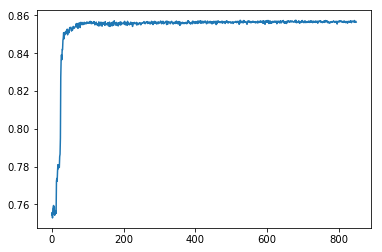

In [58]:
# plt.axes(xlim=(0,15), ylim=(0.85,0.86))
plt.plot(acc)
plt.show()